**Questions 9 and 10**

*Question 9 (skewness of household income)*

In [140]:
%matplotlib inline

In [141]:
import thinkstats2
import thinkplot
import numpy as np

In [142]:
import hinc
df = hinc.ReadData()

In [143]:
import hinc2
log_sample_6 = hinc2.InterpolateSample(df)
sample_6 = np.power(10, log_sample_6)

*Sample mean, median, and standard deviation*

In [144]:
thinkstats2.Mean(sample_6), thinkstats2.Median(sample_6), thinkstats2.Std(sample_6)

(74278.707531187203, 51226.454478940461, 93946.92996347835)

*Mean lower than median, so the sample distribution is skewed to the left.*


Skewness, and Pearson Skewness

In [145]:
thinkstats2.Skewness(sample_6), thinkstats2.PearsonMedianSkewness(sample_6)

(4.9499202444295829, 0.7361258019141782)

*Skewness coefficients have negative sign which confirms left skewness* 

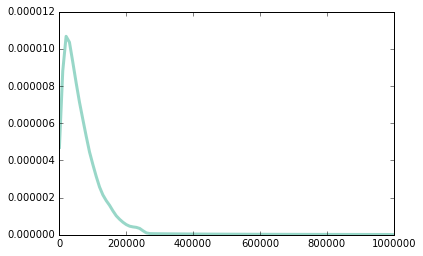

In [146]:
pdf = thinkstats2.EstimatedPdf(sample_6)
thinkplot.Pdf(pdf, label='Income')

*Fraction of households with income below mean*

In [147]:
cdf = thinkstats2.Cdf(sample_6)
cdf[thinkstats2.Mean(sample_6)]

0.66000587956687196

*Trying a higher upper bound (7)*

In [148]:
import hinc2
log_sample_7 = hinc2.InterpolateSample(df, log_upper=7)
sample_7 = np.power(10, log_sample_7)

*Mean, Median and standard deviation*

In [149]:
thinkstats2.Mean(sample_7), thinkstats2.Median(sample_7), thinkstats2.Std(sample_7)

(124267.39722164697, 51226.454478940461, 559608.5013743473)

Skewness and Pearson Skewness

In [150]:
thinkstats2.Skewness(sample_7), thinkstats2.PearsonMedianSkewness(sample_7)

(11.603690267537793, 0.39156450927742087)

*Pearson Skewness decreases.  We better stick to the fraction of households below income as a valid summary statistics*

**Question 10 (Scoring)**

*Write a function that simulates a game*

In [151]:
import random
def game(lam):
    "Returns the estimated goal scoring rate, lam is actual goal scoring rate [goals/game]"
    goals = 0
    time = 0
    while True:
        time_between_goals = random.expovariate(lam)
        time += time_between_goals
        if time >1:
            break
        goals += 1
    return goals
        
        

*Simulate many games*

In [152]:
import estimation
def simulate_games(lam=2, m=100000):
    estimates = []
    for i in range(m):
        L = game(lam)
        estimates.append(L)
    return estimates
estimates_2 = simulate_games()        
print'Mean error', estimation.MeanError(estimates_2, 2)
print'RMSE', estimation.RMSE(estimates_2, 2)

Mean error 0.00032
RMSE 1.41958444624


*The RMSE for lambda estimation is 1.4. Also, the mean error decreases as I increase the number of simulations (m above).  So this estimation appears unbiased.*

*Plot sampling distribution*

In [153]:
pmf = thinkstats2.Pmf(estimates)
cdf = thinkstats2.Cdf(estimates)
ci_5, ci_95 = cdf.Percentile(5), cdf.Percentile(95)

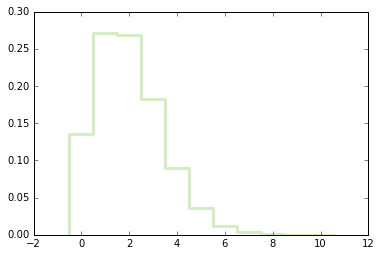

In [154]:
thinkplot.pmf(pmf)

{'xscale': 'linear', 'yscale': 'linear'}

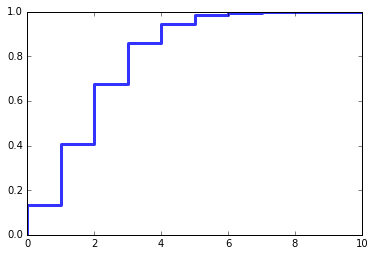

In [155]:
thinkplot.cdf(cdf)

90% confidence interval

In [156]:
(ci_5, ci_95)

(0, 5)

*Try increasing values for lambda*

In [157]:
estimates_4 = simulate_games(lam=4)
print'Mean error', estimation.MeanError(estimates_2, 4)
print'RMSE', estimation.RMSE(estimates_2, 4)

Mean error -1.99968
RMSE 2.45233358253


*The sampling error (RSME) increases for increasing values of lambda.*